# K-Nearest-Neighbors

For unserstanding the basics of KNN from stratch, a excellant ersources for KNN is at https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

https://medium.com/@adi.bronshtein/a-quick-introduction-to-k-nearest-neighbors-algorithm-62214cea29c7""

## Import Data and Python modules

In [7]:
# Python imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid')

In [12]:
# Read the Data sets
datasets = pd.read_csv('Classified Data', index_col=0)

## Data Analysis and Exploration

In [13]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


The datasets contains 1000 data with no null values.

In [14]:
datasets.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Split the data into independant and dependant feature

In [17]:
X = datasets.iloc[:,:-1].values

In [22]:
X[:5]

array([[ 0.91391733,  1.16207271,  0.56794585,  0.7554639 ,  0.78086157,
         0.35260772,  0.75969691,  0.64379756,  0.87942209,  1.23140944],
       [ 0.6356319 ,  1.00372163,  0.53534235,  0.82564485,  0.92410893,
         0.64845024,  0.67533431,  1.01354599,  0.62155222,  1.4927016 ],
       [ 0.72135981,  1.20149262,  0.92198973,  0.85559498,  1.52662939,
         0.72078089,  1.62635071,  1.15448315,  0.95787702,  1.28559679],
       [ 1.2342044 ,  1.38672629,  0.65304631,  0.82562445,  1.14250354,
         0.87512792,  1.40970806,  1.38000255,  1.52269205,  1.15309302],
       [ 1.27949082,  0.94974956,  0.62728004,  0.66897608,  1.2325373 ,
         0.70372744,  1.1155955 ,  0.6466907 ,  1.46381175,  1.41916658]])

In [23]:
Y = datasets.iloc[:,-1].values

In [24]:
Y[:5]

array([1, 0, 0, 1, 1])

## Scale the Data

As KNN algorithm works on the Euclidean distance, os it is required to scale the data before fitting into the machione learning model.

In [25]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
sc_X = scalar.fit_transform(X)

In [27]:
sc_X[:5]

array([[-0.12354188,  0.18590747, -0.91343069,  0.31962911, -1.03363681,
        -2.3083747 , -0.79895135, -1.48236813, -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333,  0.62538826, -0.44484713,
        -1.15270604, -1.12979749, -0.20224031, -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137,  0.75587279,  2.03169299,
        -0.87015616,  2.59981844,  0.28570652, -0.68249379, -0.37784986],
       [ 0.9828405 ,  1.06019327, -0.62139875,  0.62529938,  0.45282034,
        -0.26722041,  1.75020756,  1.06649052,  1.24132463, -1.02698711],
       [ 1.13927548, -0.64039191, -0.70981864, -0.05717457,  0.82288616,
        -0.93677314,  0.59678173, -1.47235164,  1.04077225,  0.2765098 ]])

## Split the Data into training and testing data

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=3)

## Train  the model with K = 1

In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)

In [30]:
classifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [33]:
classifier.fit(xtrain,ytrain)
y_pred = classifier.predict(xtest)

## Model Evaluation

In [36]:
from sklearn.metrics import confusion_matrix,classification_report

confusion_matrix(ytest,y_pred)

array([[134,  14],
       [ 12, 140]])

In [39]:
print(classification_report(ytest,y_pred))

             precision    recall  f1-score   support

          0       0.92      0.91      0.91       148
          1       0.91      0.92      0.92       152

avg / total       0.91      0.91      0.91       300



In [40]:
np.mean(y_pred!=ytest)

0.08666666666666667

## Calulate optimal K values

In [43]:
error_rate = []
for i in range(1,20):
    classifier_updated = KNeighborsClassifier(n_neighbors=i)
    classifier_updated.fit(xtrain,ytrain)
    y_updated = classifier_updated.predict(xtest)
    error_rate.append(np.mean(y_updated != ytest))
    print(error_rate)

[0.08666666666666667]
[0.08666666666666667, 0.10000000000000001]
[0.08666666666666667, 0.10000000000000001, 0.066666666666666666]
[0.08666666666666667, 0.10000000000000001, 0.066666666666666666, 0.070000000000000007]
[0.08666666666666667, 0.10000000000000001, 0.066666666666666666, 0.070000000000000007, 0.059999999999999998]
[0.08666666666666667, 0.10000000000000001, 0.066666666666666666, 0.070000000000000007, 0.059999999999999998, 0.050000000000000003]
[0.08666666666666667, 0.10000000000000001, 0.066666666666666666, 0.070000000000000007, 0.059999999999999998, 0.050000000000000003, 0.050000000000000003]
[0.08666666666666667, 0.10000000000000001, 0.066666666666666666, 0.070000000000000007, 0.059999999999999998, 0.050000000000000003, 0.050000000000000003, 0.040000000000000001]
[0.08666666666666667, 0.10000000000000001, 0.066666666666666666, 0.070000000000000007, 0.059999999999999998, 0.050000000000000003, 0.050000000000000003, 0.040000000000000001, 0.050000000000000003]
[0.086666666666666

In [44]:
error_rate

[0.08666666666666667,
 0.10000000000000001,
 0.066666666666666666,
 0.070000000000000007,
 0.059999999999999998,
 0.050000000000000003,
 0.050000000000000003,
 0.040000000000000001,
 0.050000000000000003,
 0.050000000000000003,
 0.053333333333333337,
 0.050000000000000003,
 0.056666666666666664,
 0.046666666666666669,
 0.056666666666666664,
 0.046666666666666669,
 0.056666666666666664,
 0.056666666666666664,
 0.056666666666666664]

## Data visualization

<Figure size 720x432 with 0 Axes>

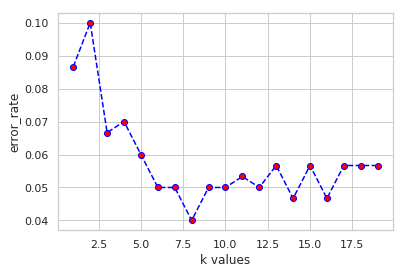

<Figure size 720x432 with 0 Axes>

In [51]:
## plt.title("error_rate vs k values")
plt.xlabel('k values')
plt.ylabel('error_rate')
plt.plot(range(1,20),error_rate,marker='o',linestyle='dashed',color='blue',markerfacecolor='red')
plt.figure(figsize=(10,6))

From te figure above, the optimal values appears to be value 18. Let calculate the average confusion matrix with K=18.

In [52]:
classifier = KNeighborsClassifier(n_neighbors=18)
classifier.fit(xtrain,ytrain)
y_pred = classifier.predict(xtest)
confusion_matrix(ytest,y_pred)

array([[137,  11],
       [  6, 146]])

In [53]:
print(classification_report(ytest,y_pred))

             precision    recall  f1-score   support

          0       0.96      0.93      0.94       148
          1       0.93      0.96      0.94       152

avg / total       0.94      0.94      0.94       300



We can see that  the average and confusion matrix increased with K=18.

# Great job!

We were able to squeeze some more performance out of our model by tuning to a better K value!